In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [85]:

apollo=pd.Series(pd.read_csv('/content/apollo tyres.csv')['Close Price'],name='apollo')
ashok_leyland=pd.Series(pd.read_csv('/content/ashokleyland.csv')['Close Price'],name='ashok_leyland')
bajaj=pd.Series(pd.read_csv('/content/bajaj.csv')['Close Price'],name='bajaj')
balkrishna_motors=pd.Series(pd.read_csv('/content/balkrishna industries.csv')['Close Price'],name='balkrishna motors')
bosch=pd.Series(pd.read_csv('/content/bosch.csv')['Close Price'],name='bosch')
cummins=pd.Series(pd.read_csv('/content/cummins.csv')['Close Price'],name='cummins')
eichermotors=pd.Series(pd.read_csv('/content/eichermotors.csv')['Close Price'],name='eichermotors')
heromotors=pd.Series(pd.read_csv('/content/heromotors.csv')['Close Price'],name='heromotors')
mahindra_mahindra=pd.Series(pd.read_csv('/content/mahindra and manindra.csv')['Close Price'],name='mahindra')
maruti=pd.Series(pd.read_csv('/content/maruti suzuki.csv')['Close Price'],name='maruti')
motherson=pd.Series(pd.read_csv('/content/motherson.csv')['Close Price'],name='motherson')
mrf=pd.Series(pd.read_csv('/content/mrf.csv')['Close Price'],name='mrf')
tatamotors=pd.Series(pd.read_csv('/content/tatamotors.csv')['Close Price'],name='tatamotors')
tube_investments=pd.Series(pd.read_csv('/content/tube investments.csv')['Close Price'],name='tube investments')
tvsmotors=pd.Series(pd.read_csv('/content/tvs motors.csv')['Close Price'],name='tvs motors')







In [86]:
df=pd.concat([apollo,ashok_leyland,bajaj,balkrishna_motors,bosch,cummins,eichermotors,heromotors,mahindra_mahindra,maruti,motherson,mrf,tatamotors,tube_investments,tvsmotors],axis=1)
df.head()

,apollo,ashok_leyland,bajaj,balkrishna motors,bosch,cummins,eichermotors,heromotors,mahindra,maruti,motherson,mrf,tatamotors,tube investments,tvs motors
0,427.50,183.10,6089.60,2578.80,21591.75,1910.50,3898.85,3819.05,1647.60,10604.10,92.04,111746.85,706.25,3368.25,1870.65
1,425.90,181.20,6065.05,2583.95,21681.45,1873.15,3812.70,3745.75,1618.90,10590.20,92.58,112261.50,712.15,3450.90,1862.00
2,422.75,179.00,6002.60,2620.70,21252.30,1874.35,3829.05,3622.25,1565.95,10537.15,89.93,111524.80,697.60,3421.55,1824.80
3,414.70,178.35,5929.80,2569.35,21026.85,1870.75,3847.10,3546.90,1552.70,10518.10,87.50,111401.25,673.65,3467.15,1800.25
4,420.90,177.95,5921.85,2552.35,21208.70,1874.65,3881.75,3568.75,1545.95,10494.00,88.21,111399.80,679.85,3420.75,1775.65


In [87]:
## clusters: tvs and mrf,maruti and ashok leyland,cummins and apollo

tvs=df['tvs motors']
mrf=df['mrf']
maruti=df['maruti']
ashok_leyland=df['ashok_leyland']
cummins=df['cummins']
apollo=df['apollo']


tvs_mrf=pd.Series([max(tvs[i],mrf[i]) for i in range(len(tvs))],name='tvs_mrf')
maruti_ashokleyland=pd.Series([max(maruti[i],ashok_leyland[i]) for i in range(len(maruti))],name='maruti_ashokleyland')
cummins_apollo=pd.Series([max(cummins[i],apollo[i]) for i in range(len(cummins))],name='cummins_apollo')


In [88]:
date_range = pd.date_range(end='2023-11-30', start='2022-01-03', freq='D')[::-1]
date_df = pd.Series(date_range,name='date')

df_combined=pd.concat([date_df,tvs_mrf,maruti_ashokleyland,cummins_apollo,bajaj,balkrishna_motors,bosch,eichermotors,heromotors,mahindra_mahindra,motherson,tatamotors,tube_investments],axis=1)
org_data=df_combined

In [89]:
df_combined=df_combined.dropna()


In [90]:
df_combined.head()

,date,tvs_mrf,maruti_ashokleyland,cummins_apollo,bajaj,balkrishna motors,bosch,eichermotors,heromotors,mahindra,motherson,tatamotors,tube investments
0,2023-11-30,111746.85,10604.10,1910.50,6089.60,2578.80,21591.75,3898.85,3819.05,1647.60,92.04,706.25,3368.25
1,2023-11-29,112261.50,10590.20,1873.15,6065.05,2583.95,21681.45,3812.70,3745.75,1618.90,92.58,712.15,3450.90
2,2023-11-28,111524.80,10537.15,1874.35,6002.60,2620.70,21252.30,3829.05,3622.25,1565.95,89.93,697.60,3421.55
3,2023-11-27,111401.25,10518.10,1870.75,5929.80,2569.35,21026.85,3847.10,3546.90,1552.70,87.50,673.65,3467.15
4,2023-11-26,111399.80,10494.00,1874.65,5921.85,2552.35,21208.70,3881.75,3568.75,1545.95,88.21,679.85,3420.75


In [91]:
df_combined.set_index(df_combined['date'],inplace=True)


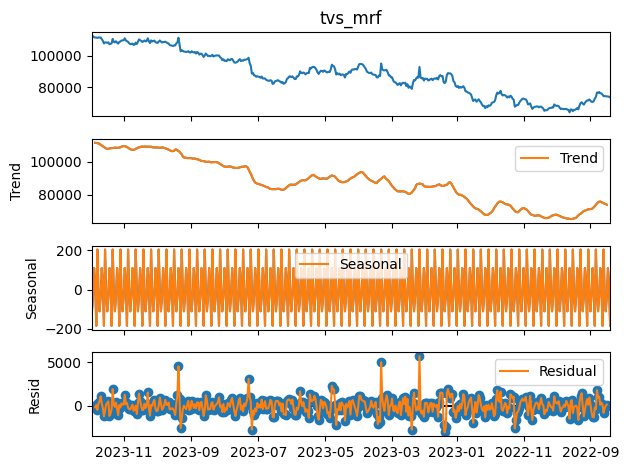

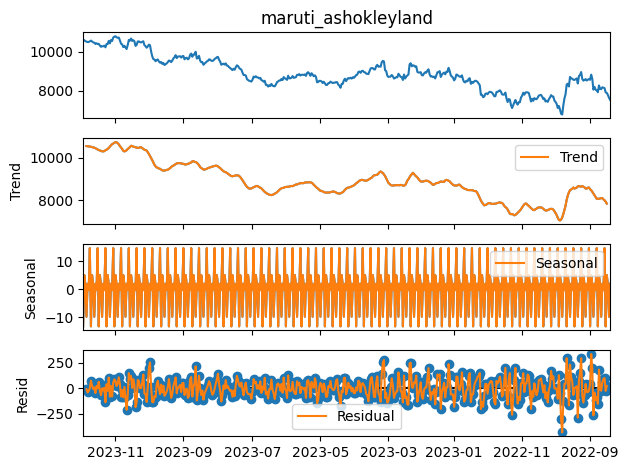

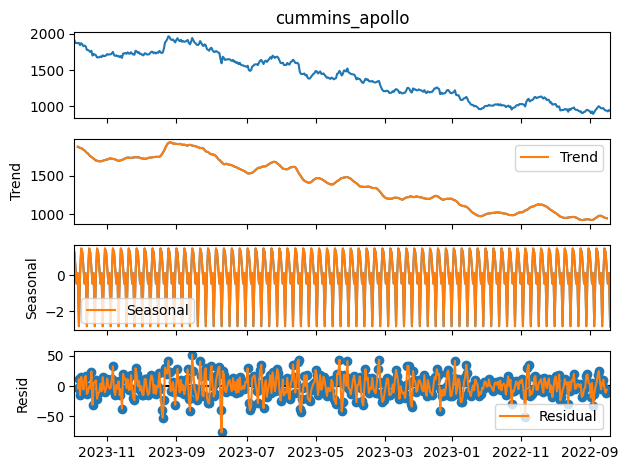

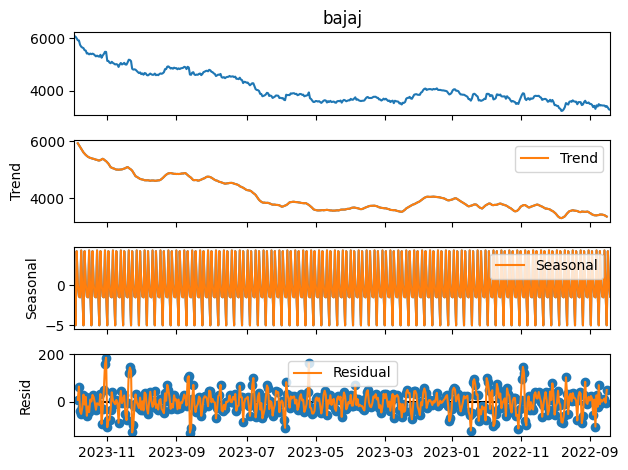

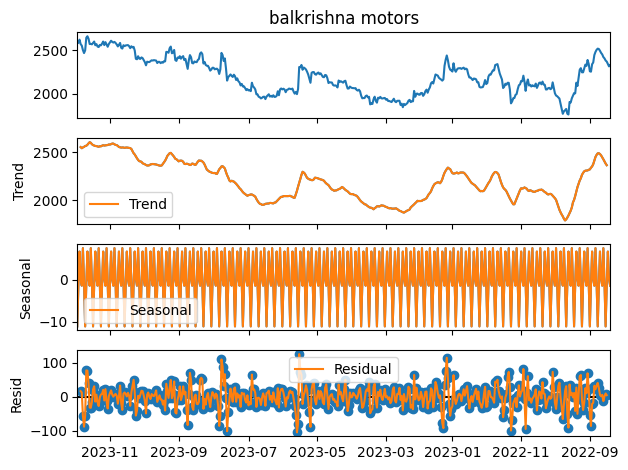

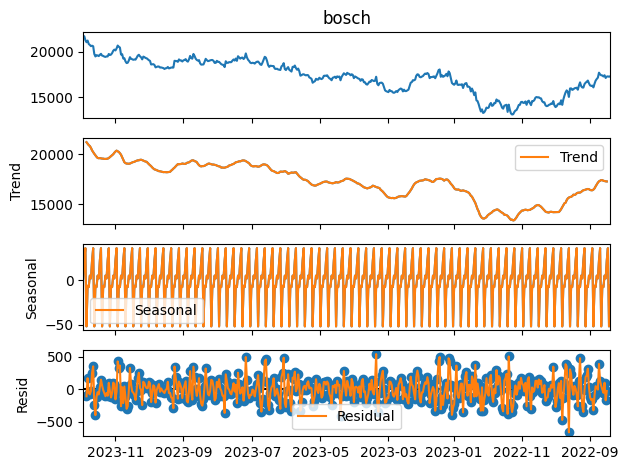

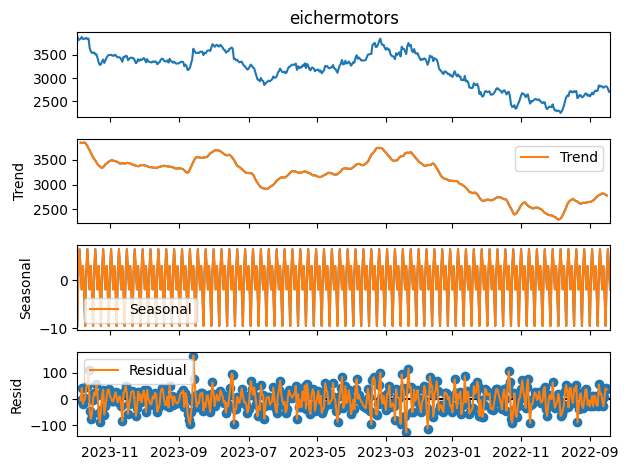

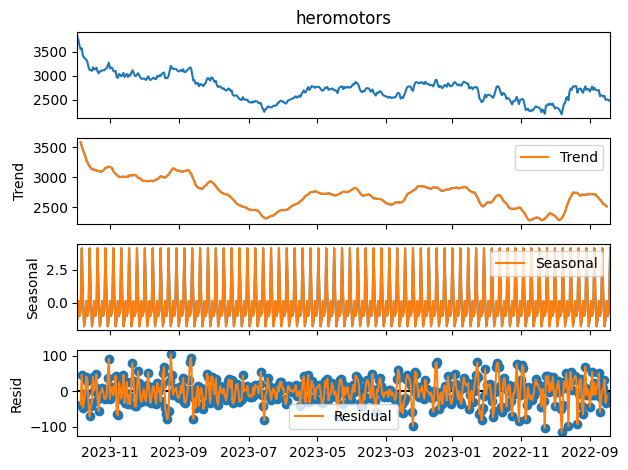

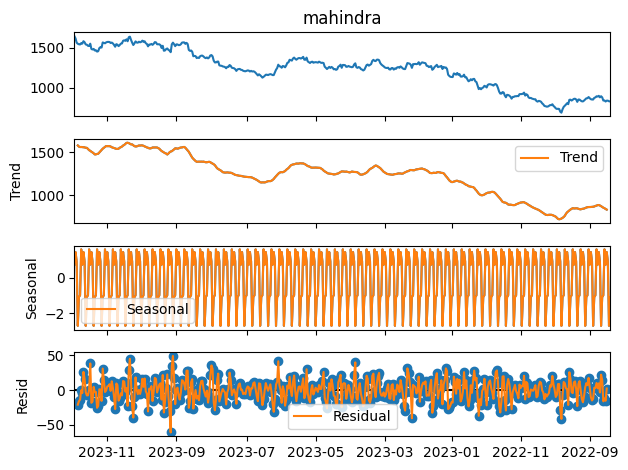

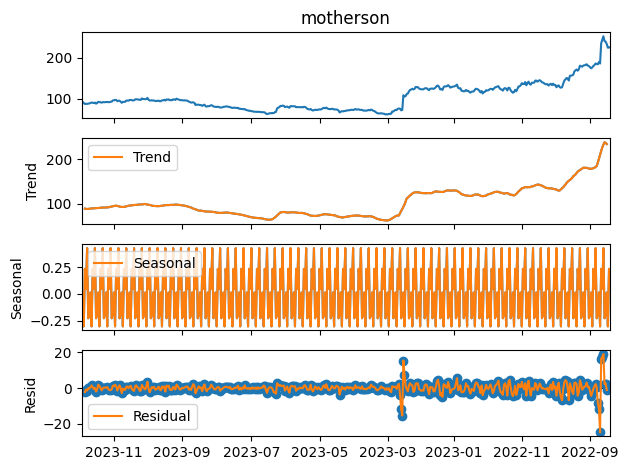

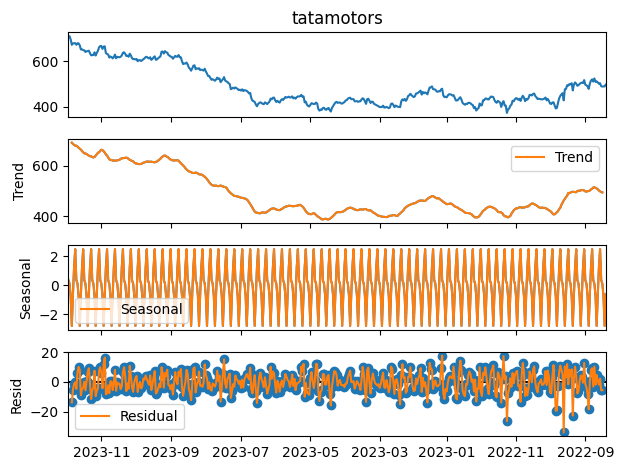

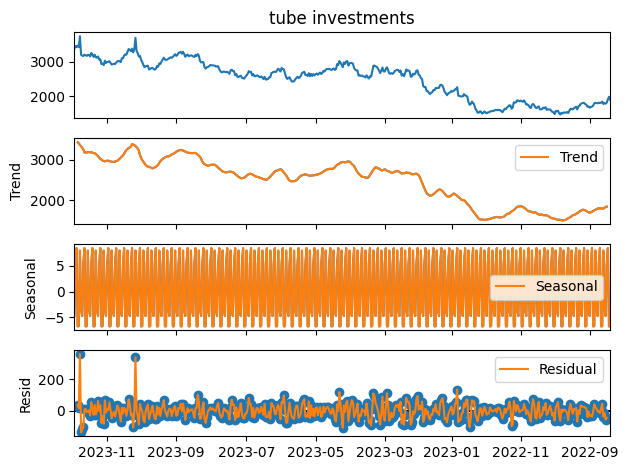

In [92]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,1], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()



decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,2], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()



decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,3], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()



decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,4], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()



decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,5], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()


decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,6], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()


decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,7], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()


decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,8], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()


decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,9], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()



decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,10], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()



decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,11], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()



decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,12], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()


In [93]:
print(df_combined['motherson'][:100].mean())
print(df_combined['motherson'][100:230].mean())
print(df_combined['motherson'][230:360].mean())
print(df_combined['motherson'][360:474].mean())

94.9067
76.88507692307692
99.59346153846153
150.49473684210525


In [94]:

# for c in df_combined.columns[1:]:
#   pacf_values = sm.tsa.stattools.pacf(df_combined[c], nlags=20)
#   print(c,pacf_values)

In [95]:

# for c in df_combined.columns[1:]:
#   acf_values = sm.tsa.stattools.acf(df_combined[c], nlags=20)
#   print(c,acf_values)

In [96]:
df_combined=df_combined.diff().dropna()

In [97]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from itertools import product


# Dictionary to store the best ARMA models for each column
best_arma_models = {}

# Function to evaluate ARMA models for a given column
def evaluate_arma_models(data):
    best_aic = np.inf
    best_arma_model = None

    # Define the range of p and q values
    p_values = range(0, 3)  # Adjust the range as needed
    q_values = range(0, 3)  # Adjust the range as needed

    # Iterate through all possible combinations of p and q
    for p, q in product(p_values, q_values):
        # Skip the combination if both p and q are 0
        if p == 0 and q == 0:
            continue

        try:
            # Fit the ARMA model
            arma_model = ARIMA(data, order=(p, 0, q))
            results = arma_model.fit()

            # Keep track of the model with the lowest AIC
            if results.aic < best_aic:
                best_aic = results.aic
                best_arma_model = results

        except:
            continue

    return best_arma_model

# Iterate through each column
for column in df_combined.columns:
    # Find the best ARMA model for the current column
    best_arma_model = evaluate_arma_models(df_combined[column])
    best_arma_models[column] = best_arma_model

    # # Print the summary of the best model for the current column
    # print(f"Best ARMA model for column '{column}':")
    # print(best_arma_model)
    # print()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

In [98]:
best_arma_models.keys()

dict_keys(['date', 'tvs_mrf', 'maruti_ashokleyland', 'cummins_apollo', 'bajaj', 'balkrishna motors', 'bosch', 'eichermotors', 'heromotors', 'mahindra', 'motherson', 'tatamotors', 'tube investments'])

In [99]:
print(best_arma_models['tube investments'].summary())

                               SARIMAX Results                                
Dep. Variable:       tube investments   No. Observations:                  473
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2650.377
Date:                Sun, 31 Mar 2024   AIC                           5306.754
Time:                        12:13:12   BIC                           5319.232
Sample:                             0   HQIC                          5311.662
                                - 473                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1182      2.886     -1.080      0.280      -8.776       2.539
ar.L1         -0.1251      0.027     -4.591      0.000      -0.179      -0.072
sigma2      4304.0740    148.880     28.910      0.0

In [100]:
apollo_tyres_dec_closing=pd.Series(pd.read_csv('/content/apollo_dec_closing.csv')['Close Price'],name='apollo tyres')
ashok_leyland_dec_closing=pd.Series(pd.read_csv('/content/ashok_leyland_dec_closing.csv')['Close Price'],name='ashok leyland')
bajaj_dec_closing=pd.Series(pd.read_csv('/content/bajaj_auto_dec_closing.csv')['Close Price'],name='bajaj')
balkrishna_dec_closing=pd.Series(pd.read_csv('/content/balkrishna_motors_dec_closing.csv')['Close Price'],name='balkrishna motors')
bosch_dec_closing=pd.Series(pd.read_csv('/content/bosch_dec_closing.csv')['Close Price'],name='bosch')
cummins_dec_closing=pd.Series(pd.read_csv('/content/cummins_dec_closing.csv')['Close Price'],name='cummins')
eichermotors_dec_closing=pd.Series(pd.read_csv('/content/eichermotors_dec_closing.csv')['Close Price'],name='eicher motors')
heromotors_dec_closing=pd.Series(pd.read_csv('/content/heromotors_dec_closing.csv')['Close Price'],name='heromotors')
mahindra_dec_closing=pd.Series(pd.read_csv('/content/mahindra_mahindra_dec_closing.csv')['Close Price'],name='mahindra')
maruti_dec_closing=pd.Series(pd.read_csv('/content/maruti_dec_closing.csv')['Close Price'],name='maruti')
motherson_dec_closing=pd.Series(pd.read_csv('/content/motherson_dec_closing.csv')['Close Price'],name='motherson')
mrf_dec_closing=pd.Series(pd.read_csv('/content/mrf_dec_closing.csv')['Close Price'],name='mrf')
tatamotors_dec_closing=pd.Series(pd.read_csv('/content/tatamotors_dec_closing.csv')['Close Price'],name='tatamotors')
tubeinvestments_dec_closing=pd.Series(pd.read_csv('/content/tube_investments_dec_closing.csv')['Close Price'],name='tubeinvestments')
tvsmotors_dec_closing=pd.Series(pd.read_csv('/content/tvsmotors_dec_closing.csv')['Close Price'],name='tvsmotors')



In [101]:
## tvs-mrf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


# Dates for prediction
prediction_dates = pd.to_datetime([
    '2023-12-29', '2023-12-28', '2023-12-27', '2023-12-26', '2023-12-22',
    '2023-12-21', '2023-12-20', '2023-12-19', '2023-12-18', '2023-12-15',
    '2023-12-14', '2023-12-13', '2023-12-12', '2023-12-11', '2023-12-08',
    '2023-12-07', '2023-12-06', '2023-12-05', '2023-12-04', '2023-12-01'
])
prediction_dates.sort_values()

forecast=best_arma_models['tvs_mrf'].forecast(steps=len(prediction_dates))

# Create a DataFrame with the forecasted values and dates

forecast_df=pd.DataFrame({'Date':prediction_dates,'Forecast':forecast})
tvs_mrf_closing_diff=tvsmotors_dec_closing.diff().dropna()
predicted=np.array(forecast_df['Forecast'])
actual=np.array(tvs_mrf_closing_diff)
print(np.mean(np.abs(actual,predicted[:19])))
tvspred=predicted

21.968421052631573


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [102]:
## maruti-ashokleyland
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


forecast=best_arma_models['maruti_ashokleyland'].forecast(steps=len(prediction_dates))

# Create a DataFrame with the forecasted values and dates

forecast_df=pd.DataFrame({'Date':prediction_dates,'Forecast':forecast})
ashokleyland_closing_diff=ashok_leyland_dec_closing.diff().dropna()
predicted=np.array(forecast_df['Forecast'])
actual=np.array(ashokleyland_closing_diff)
print(np.mean(np.abs(actual,predicted[:19])))
ashokleylandpred=predicted

1.9052631578947363


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [103]:
## cummins-apollo
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


forecast=best_arma_models['maruti_ashokleyland'].forecast(steps=len(prediction_dates))

# Create a DataFrame with the forecasted values and dates

forecast_df=pd.DataFrame({'Date':prediction_dates,'Forecast':forecast})
apollo_closing_diff=apollo_tyres_dec_closing.diff().dropna()
predicted=np.array(forecast_df['Forecast'])
actual=np.array(apollo_closing_diff)
print(np.mean(np.abs(actual,predicted[:19])))
apollopred=predicted

5.768421052631589


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [104]:
## eichermotors

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


forecast=best_arma_models['eichermotors'].forecast(steps=len(prediction_dates))

# Create a DataFrame with the forecasted values and dates

forecast_df=pd.DataFrame({'Date':prediction_dates,'Forecast':forecast})
eichermotors_closing_diff=eichermotors_dec_closing.diff().dropna()
predicted=np.array(forecast_df['Forecast'])
actual=np.array(eichermotors_closing_diff)
print(np.mean(np.abs(actual,predicted[:19])))
eicherpred=predicted

66.71578947368423


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [105]:
## heromotors

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


forecast=best_arma_models['heromotors'].forecast(steps=len(prediction_dates))

# Create a DataFrame with the forecasted values and dates

forecast_df=pd.DataFrame({'Date':prediction_dates,'Forecast':forecast})
heromotors_closing_diff=heromotors_dec_closing.diff().dropna()
predicted=np.array(forecast_df['Forecast'])
actual=np.array(heromotors_closing_diff)
print(np.mean(np.abs(actual,predicted[:19])))
heropred=predicted

44.9026315789473


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [106]:
#mahindra
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


forecast=best_arma_models['mahindra'].forecast(steps=len(prediction_dates))

# Create a DataFrame with the forecasted values and dates

forecast_df=pd.DataFrame({'Date':prediction_dates,'Forecast':forecast})
mahindra_closing_diff=mahindra_dec_closing.diff().dropna()
predicted=np.array(forecast_df['Forecast'])
actual=np.array(mahindra_closing_diff)
print(np.mean(np.abs(actual,predicted[:19])))
mahindrapred=predicted

22.971052631578925


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [107]:
## motherson

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


forecast=best_arma_models['motherson'].forecast(steps=len(prediction_dates))

# Create a DataFrame with the forecasted values and dates

forecast_df=pd.DataFrame({'Date':prediction_dates,'Forecast':forecast})
motherson_closing_diff=motherson_dec_closing.diff().dropna()
predicted=np.array(forecast_df['Forecast'])
actual=np.array(motherson_closing_diff)
print(np.mean(np.abs(actual,predicted[:19])))
mothersonpred=predicted

1.4263157894736853


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [108]:
## tube investments

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


forecast=best_arma_models['tube investments'].forecast(steps=len(prediction_dates))

# Create a DataFrame with the forecasted values and dates

forecast_df=pd.DataFrame({'Date':prediction_dates,'Forecast':forecast})
tubeinvestments_closing_diff=tubeinvestments_dec_closing.diff().dropna()
predicted=np.array(forecast_df['Forecast'])
actual=np.array(tubeinvestments_closing_diff)
print(np.mean(np.abs(actual,predicted[:19])))
tubeinvestmentpred=predicted

63.568421052631585


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [109]:
## bajaj

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


forecast=best_arma_models['bajaj'].forecast(steps=len(prediction_dates))

# Create a DataFrame with the forecasted values and dates

forecast_df=pd.DataFrame({'Date':prediction_dates,'Forecast':forecast})
bajaj_closing_diff=bajaj_dec_closing.diff().dropna()
predicted=np.array(forecast_df['Forecast'])
actual=np.array(bajaj_closing_diff)
print(np.mean(np.abs(actual,predicted[:19])))
bajajpred=predicted

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


85.67894736842103


In [110]:
## balkrishna motors

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


forecast=best_arma_models['balkrishna motors'].forecast(steps=len(prediction_dates))

# Create a DataFrame with the forecasted values and dates

forecast_df=pd.DataFrame({'Date':prediction_dates,'Forecast':forecast})
balkrishna_closing_diff=balkrishna_dec_closing.diff().dropna()
predicted=np.array(forecast_df['Forecast'])
actual=np.array(balkrishna_closing_diff)
print(np.mean(np.abs(actual,predicted[:19])))
balkrishnapred=predicted

28.83947368421059


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [111]:
## bosch

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


forecast=best_arma_models['bosch'].forecast(steps=len(prediction_dates))

# Create a DataFrame with the forecasted values and dates

forecast_df=pd.DataFrame({'Date':prediction_dates,'Forecast':forecast})
bosch_closing_diff=bosch_dec_closing.diff().dropna()
predicted=np.array(forecast_df['Forecast'])
actual=np.array(bosch_closing_diff)
print(np.mean(np.abs(actual,predicted[:19])))
boschpred=predicted

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


165.51315789473702


Text(0.5, 1.0, 'TVS')

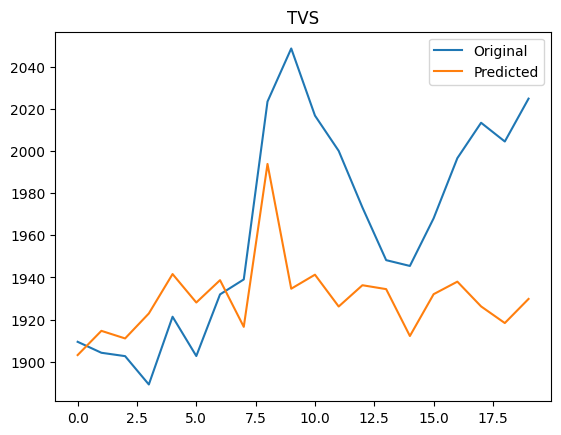

In [112]:
## plot of actual vs pred


## plotting the actual vs predicted data


## tvs

original=np.array(tvsmotors_dec_closing)
predicted=np.array(tvspred)
actual_pred=[]
#print(axis_original)

last_obs_val=original[len(original)-1]

actual_pred.append(last_obs_val+tvspred[0])
for diff in predicted[1:]:
  actual_pred.append(original[-1]+diff)
original=list(original)
actual_pred=list(actual_pred)
original.reverse()
actual_pred.reverse()

import matplotlib.pyplot as plt

plt.plot(original,label='original data')
plt.plot(actual_pred,label='predicted values')
plt.legend(['Original','Predicted'])
tvs_actual_pred=actual_pred
plt.title('TVS')


Text(0.5, 1.0, 'Ashok Leyland')

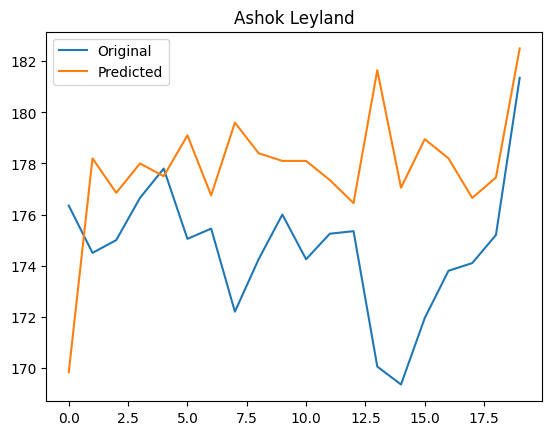

In [113]:

## ashok leyland

original=np.array(ashok_leyland_dec_closing)
predicted=np.array(ashokleylandpred)
actual_pred=[]
#print(axis_original)

last_obs_val=original[len(original)-1]

actual_pred.append(last_obs_val+ashokleylandpred[0])
for diff in predicted[1:]:
  actual_pred.append(original[-1]+diff)
original=list(original)
actual_pred=list(actual_pred)
original.reverse()
actual_pred.reverse()

import matplotlib.pyplot as plt

plt.plot(original,label='original data')
plt.plot(actual_pred,label='predicted values')
plt.legend(['Original','Predicted'])
ashok_actual_pred=actual_pred
plt.title('Ashok Leyland')

Text(0.5, 1.0, 'Apollo')

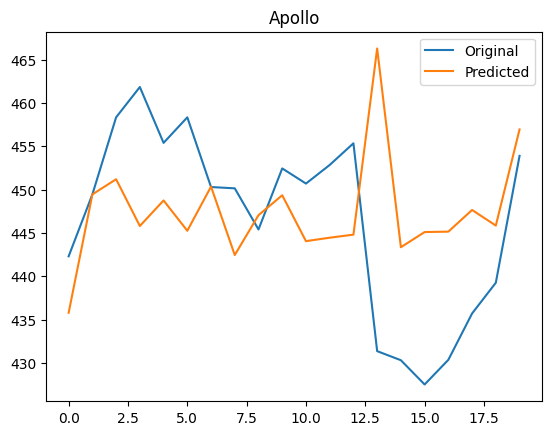

In [114]:
##apollo

original=np.array(apollo_tyres_dec_closing)
predicted=np.array(apollopred)
actual_pred=[]
#print(axis_original)

last_obs_val=original[len(original)-1]

actual_pred.append(last_obs_val+apollopred[0])
for diff in predicted[1:]:
  actual_pred.append(original[-1]+diff)
original=list(original)
actual_pred=list(actual_pred)
original.reverse()
actual_pred.reverse()

import matplotlib.pyplot as plt

plt.plot(original,label='original data')
plt.plot(actual_pred,label='predicted values')
plt.legend(['Original','Predicted'])
apollo_actual_pred=actual_pred
plt.title('Apollo')

Text(0.5, 1.0, 'EicherMotors')

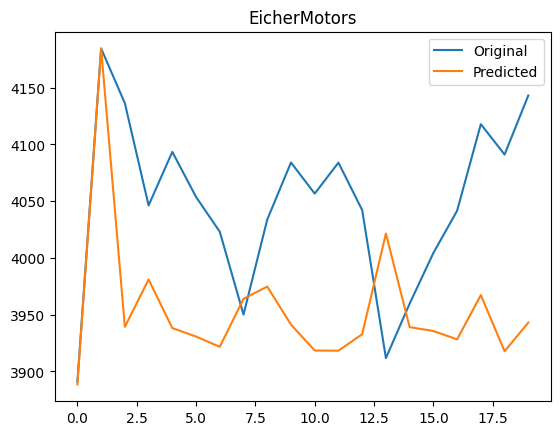

In [115]:
## eichermotors

original=np.array(eichermotors_dec_closing)
predicted=np.array(eicherpred)
actual_pred=[]

last_obs_val=original[len(original)-1]

actual_pred.append(last_obs_val+eicherpred[0])
for diff in predicted[1:]:
  actual_pred.append(original[-1]+diff)
original=list(original)
actual_pred=list(actual_pred)
original.reverse()
actual_pred.reverse()

import matplotlib.pyplot as plt

plt.plot(original,label='original data')
plt.plot(actual_pred,label='predicted values')
plt.legend(['Original','Predicted'])
eicher_actual_pred=actual_pred
plt.title('EicherMotors')

Text(0.5, 1.0, 'Hero motors')

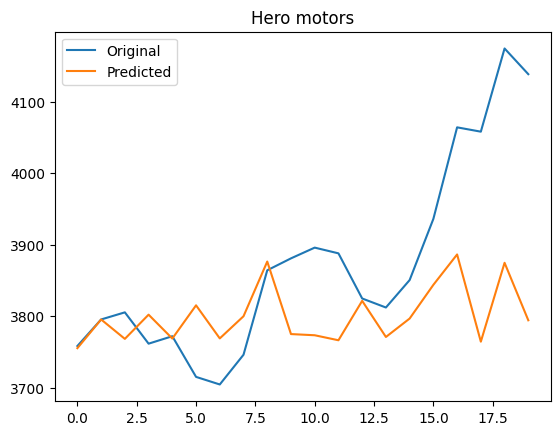

In [116]:
## heromotors

original=np.array(heromotors_dec_closing)
predicted=np.array(heropred)
actual_pred=[]

last_obs_val=original[len(original)-1]

actual_pred.append(last_obs_val+heropred[0])
for diff in predicted[1:]:
  actual_pred.append(original[-1]+diff)
original=list(original)
actual_pred=list(actual_pred)
original.reverse()
actual_pred.reverse()

import matplotlib.pyplot as plt

plt.plot(original,label='original data')
plt.plot(actual_pred,label='predicted values')
plt.legend(['Original','Predicted'])
hero_actual_pred=actual_pred
plt.title('Hero motors')

Text(0.5, 1.0, 'Mahindra')

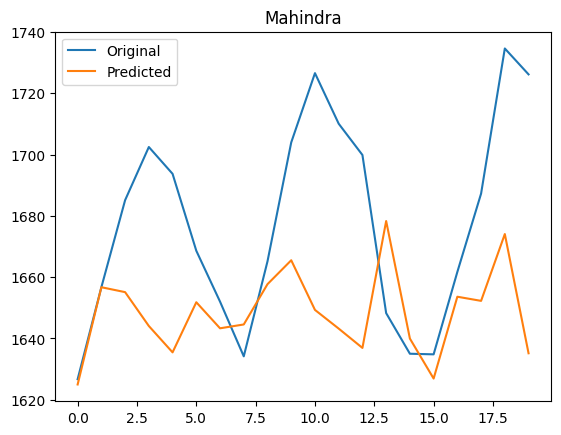

In [117]:
## mahindra

original=np.array(mahindra_dec_closing)
predicted=np.array(mahindrapred)
actual_pred=[]

last_obs_val=original[len(original)-1]

actual_pred.append(last_obs_val+mahindrapred[0])
for diff in predicted[1:]:
  actual_pred.append(original[-1]+diff)
original=list(original)
actual_pred=list(actual_pred)
original.reverse()
actual_pred.reverse()

import matplotlib.pyplot as plt

plt.plot(original,label='original data')
plt.plot(actual_pred,label='predicted values')
plt.legend(['Original','Predicted'])
mahindra_actual_pred=actual_pred
plt.title('Mahindra')

Text(0.5, 1.0, 'Motherson')

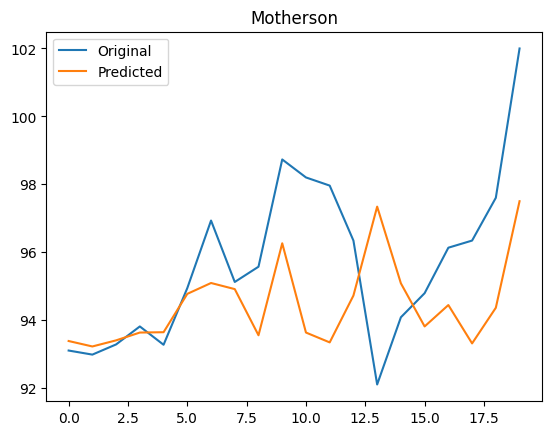

In [118]:
## motherson

original=np.array(motherson_dec_closing)
predicted=np.array(mothersonpred)
actual_pred=[]

last_obs_val=original[len(original)-1]

actual_pred.append(last_obs_val+mothersonpred[0])
for diff in predicted[1:]:
  actual_pred.append(original[-1]+diff)
original=list(original)
actual_pred=list(actual_pred)
original.reverse()
actual_pred.reverse()

import matplotlib.pyplot as plt

plt.plot(original,label='original data')
plt.plot(actual_pred,label='predicted values')
plt.legend(['Original','Predicted'])
motherson_actual_pred=actual_pred
plt.title('Motherson')

Text(0.5, 1.0, 'Tube Investments')

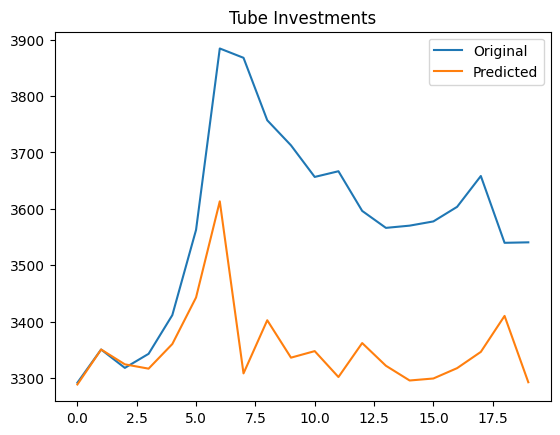

In [119]:
## tube investments

original=np.array(tubeinvestments_dec_closing)
predicted=np.array(tubeinvestmentpred)
actual_pred=[]

last_obs_val=original[len(original)-1]

actual_pred.append(last_obs_val+tubeinvestmentpred[0])
for diff in predicted[1:]:
  actual_pred.append(original[-1]+diff)
original=list(original)
actual_pred=list(actual_pred)
original.reverse()
actual_pred.reverse()

import matplotlib.pyplot as plt

plt.plot(original,label='original data')
plt.plot(actual_pred,label='predicted values')
plt.legend(['Original','Predicted'])
tube_actual_pred=actual_pred
plt.title('Tube Investments')

Text(0.5, 1.0, 'Bajaj')

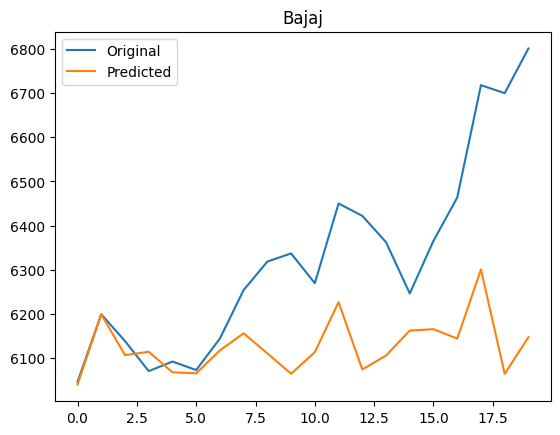

In [120]:
## bajaj

original=np.array(bajaj_dec_closing)
predicted=np.array(bajajpred)
actual_pred=[]

last_obs_val=original[len(original)-1]

actual_pred.append(last_obs_val+bajajpred[0])
for diff in predicted[1:]:
  actual_pred.append(original[-1]+diff)
original=list(original)
actual_pred=list(actual_pred)
original.reverse()
actual_pred.reverse()

import matplotlib.pyplot as plt

plt.plot(original,label='original data')
plt.plot(actual_pred,label='predicted values')
plt.legend(['Original','Predicted'])
bajaj_actual_pred=actual_pred
plt.title('Bajaj')

Text(0.5, 1.0, 'Balkrishna Motors')

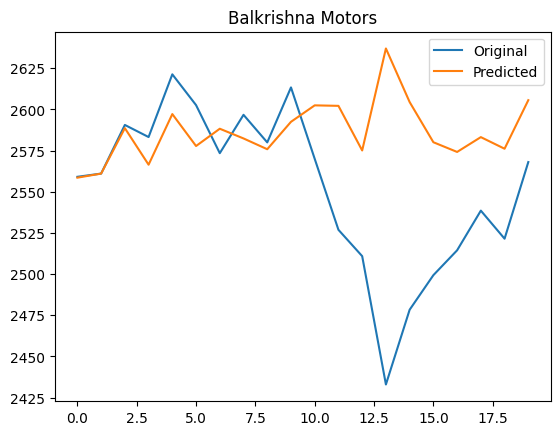

In [121]:
## balkrishna motors

original=np.array(balkrishna_dec_closing)
predicted=np.array(balkrishnapred)
actual_pred=[]

last_obs_val=original[len(original)-1]

actual_pred.append(last_obs_val+balkrishnapred[0])
for diff in predicted[1:]:
  actual_pred.append(original[-1]+diff)
original=list(original)
actual_pred=list(actual_pred)
original.reverse()
actual_pred.reverse()

import matplotlib.pyplot as plt

plt.plot(original,label='original data')
plt.plot(actual_pred,label='predicted values')
plt.legend(['Original','Predicted'])
balkrishna_actual_pred=actual_pred
plt.title('Balkrishna Motors')

Text(0.5, 1.0, 'Bosch')

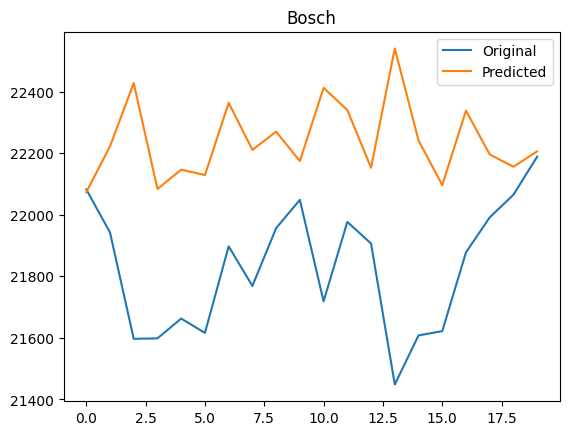

In [122]:
## bosch

original=np.array(bosch_dec_closing)
predicted=np.array(boschpred)
actual_pred=[]

last_obs_val=original[len(original)-1]

actual_pred.append(last_obs_val+boschpred[0])
for diff in predicted[1:]:
  actual_pred.append(original[-1]+diff)
original=list(original)
actual_pred=list(actual_pred)
original.reverse()
actual_pred.reverse()

import matplotlib.pyplot as plt

plt.plot(original,label='original data')
plt.plot(actual_pred,label='predicted values')
plt.legend(['Original','Predicted'])
bosch_actual_pred=actual_pred
plt.title('Bosch')

In [123]:
best_arma_models.keys()

dict_keys(['date', 'tvs_mrf', 'maruti_ashokleyland', 'cummins_apollo', 'bajaj', 'balkrishna motors', 'bosch', 'eichermotors', 'heromotors', 'mahindra', 'motherson', 'tatamotors', 'tube investments'])

In [124]:
## combining time series models (best weight for each cluster)



tvs_original=np.array(tvsmotors_dec_closing)
ashok_original=np.array(ashok_leyland_dec_closing)
apollo_original=np.array(apollo_tyres_dec_closing)
bajaj_original=np.array(bajaj_dec_closing)
balkrishna_original=np.array(balkrishna_dec_closing)
bosch_original=np.array(bosch_dec_closing)
eicher_original=np.array(eichermotors_dec_closing)
heromotors_original=np.array(heromotors_dec_closing)
mahindra_original=np.array(mahindra_dec_closing)
motherson_original=np.array(motherson_dec_closing)
tata_original=np.array(tatamotors_dec_closing)
tube_original=np.array(tubeinvestments_dec_closing)


In [141]:
# model for tvs


ct=0
min_error=1.7976931348623157e+308
best_weights=[]

while ct<100:
  m1=np.random.rand()
  m2=np.random.rand()*0.06
  m3=np.random.rand()*0.06
  m4=np.random.rand()*0.06
  m5=np.random.rand()*0.06
  m6=np.random.rand()*0.06
  m7=np.random.rand()*0.06
  m8=np.random.rand()*0.06
  m9=np.random.rand()*0.06
  m10=np.random.rand()*0.06
  m11=np.random.rand()*0.06
  sum=np.sum([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11])
  m1=m1/sum
  m2=m2/sum
  m3=m3/sum
  m4=m4/sum
  m5=m5/sum
  m6=m6/sum
  m7=m7/sum
  m8=m8/sum
  m9=m9/sum
  m10=m10/sum
  m11=m11/sum
  mse=0
  temp=[]
  if max(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11)==m1 and m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11<=1:

    for i in range(len(tvs_actual_pred)):
      v=m1*tvs_actual_pred[i]+m2*ashok_actual_pred[i]+m3*apollo_actual_pred[i]+m4*bajaj_actual_pred[i]+m5*balkrishna_actual_pred[i]+m6*bosch_actual_pred[i]+m7*eicher_actual_pred[i]+m8*hero_actual_pred[i]+m9*mahindra_actual_pred[i]+m10*motherson_actual_pred[i]+m11*tube_actual_pred[i]
      temp.append(v)
    temp=np.array(temp)
    # print(temp)
    mse=np.mean((tvs_actual_pred-temp)**2)
    if mse<min_error:
      best_weights=[]
      min_error=mse
      best_weights.append(m1)
      best_weights.append(m2)
      best_weights.append(m3)
      best_weights.append(m4)
      best_weights.append(m5)
      best_weights.append(m6)
      best_weights.append(m7)
      best_weights.append(m8)
      best_weights.append(m9)
      best_weights.append(m10)
      best_weights.append(m11)
    ct=ct+1
  else:
    ct=ct+1
print(best_weights)

pred=[]
for i in range(len(tvs_actual_pred)):
  v=best_weights[0]*tvs_actual_pred[i]+best_weights[1]*ashok_actual_pred[i]+best_weights[2]*apollo_actual_pred[i]+best_weights[3]*bajaj_actual_pred[i]+best_weights[4]*balkrishna_actual_pred[i]+best_weights[5]*bosch_actual_pred[i]+best_weights[6]*eicher_actual_pred[i]+best_weights[7]*hero_actual_pred[i]+best_weights[8]*mahindra_actual_pred[i]+best_weights[9]*motherson_actual_pred[i]+best_weights[10]*tube_actual_pred[i]
  pred.append(v)

[0.7696281026624708, 0.04501026450062281, 0.03428668599916671, 0.00227786772573437, 0.047679297434965504, 0.004872057381412266, 0.003986463789565384, 0.03108291048693746, 0.02199872114641309, 0.03199886500667489, 0.007178763866036623]


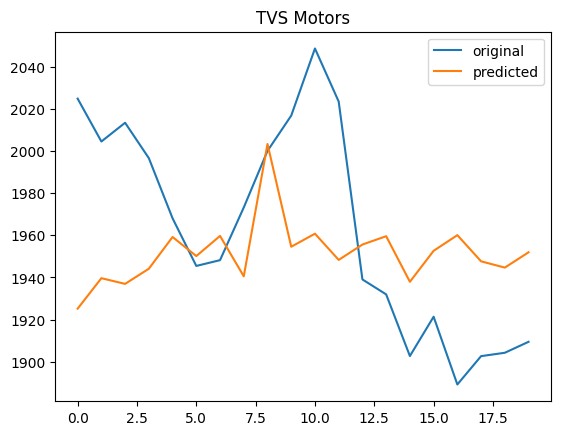

In [143]:
## tvs combined
plt.title('TVS Motors')
plt.plot(tvs_original)
plt.plot(pred)
plt.legend(['original','predicted'])

In [153]:
## ashok leyland



ct=0
min_error=1.7976931348623157e+308
best_weights=[]

while ct<100:
  m1=np.random.rand()*0.00001
  m2=np.random.rand()
  m3=np.random.rand()*0.00001
  m4=np.random.rand()*0.00001
  m5=np.random.rand()*0.00001
  m6=np.random.rand()*0.00001
  m7=np.random.rand()*0.00001
  m8=np.random.rand()*0.00001
  m9=np.random.rand()*0.00001
  m10=np.random.rand()*0.00001
  m11=np.random.rand()*0.00001
  sum=np.sum([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11])
  m1=m1/sum
  m2=m2/sum
  m3=m3/sum
  m4=m4/sum
  m5=m5/sum
  m6=m6/sum
  m7=m7/sum
  m8=m8/sum
  m9=m9/sum
  m10=m10/sum
  m11=m11/sum
  mse=0
  temp=[]
  if max(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11)==m2 and m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11<=1:

    for i in range(len(ashok_actual_pred)):
      v=m1*tvs_actual_pred[i]+m2*ashok_actual_pred[i]+m3*apollo_actual_pred[i]+m4*bajaj_actual_pred[i]+m5*balkrishna_actual_pred[i]+m6*bosch_actual_pred[i]+m7*eicher_actual_pred[i]+m8*hero_actual_pred[i]+m9*mahindra_actual_pred[i]+m10*motherson_actual_pred[i]+m11*tube_actual_pred[i]
      temp.append(v)
    temp=np.array(temp)
    # print(temp)
    mse=np.mean((ashok_actual_pred-temp)**2)
    if mse<min_error:
      best_weights=[]
      min_error=mse
      best_weights.append(m1)
      best_weights.append(m2)
      best_weights.append(m3)
      best_weights.append(m4)
      best_weights.append(m5)
      best_weights.append(m6)
      best_weights.append(m7)
      best_weights.append(m8)
      best_weights.append(m9)
      best_weights.append(m10)
      best_weights.append(m11)
    ct=ct+1
  else:
    ct=ct+1
print(best_weights)

pred=[]
for i in range(len(ashok_actual_pred)):
  v=best_weights[0]*tvs_actual_pred[i]+best_weights[1]*ashok_actual_pred[i]+best_weights[2]*apollo_actual_pred[i]+best_weights[3]*bajaj_actual_pred[i]+best_weights[4]*balkrishna_actual_pred[i]+best_weights[5]*bosch_actual_pred[i]+best_weights[6]*eicher_actual_pred[i]+best_weights[7]*hero_actual_pred[i]+best_weights[8]*mahindra_actual_pred[i]+best_weights[9]*motherson_actual_pred[i]+best_weights[10]*tube_actual_pred[i]
  pred.append(v)

[4.277537231760183e-06, 0.9999534875623918, 1.0036425412286165e-05, 2.9748579803354468e-06, 2.97788195262637e-06, 3.776862751943092e-07, 5.588135722573045e-06, 8.274650968530693e-06, 2.494198172387867e-06, 5.507568310043062e-06, 4.00349558259615e-06]


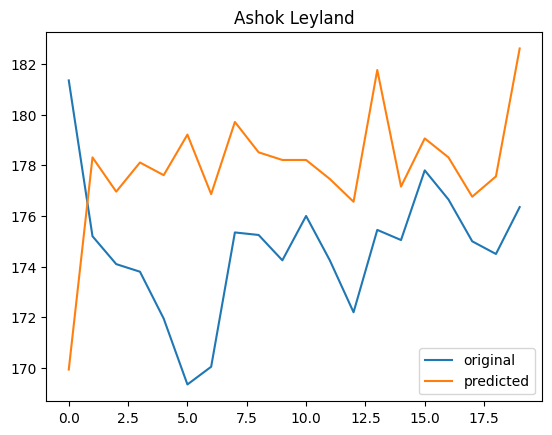

In [154]:

plt.title('Ashok Leyland')
plt.plot(ashok_original)
plt.plot(pred)
plt.legend(['original','predicted'])

In [160]:
## apollo



ct=0
min_error=1.7976931348623157e+308
best_weights=[]

while ct<100:
  m1=np.random.rand()*0.006
  m2=np.random.rand()*0.006
  m3=np.random.rand()
  m4=np.random.rand()*0.006
  m5=np.random.rand()*0.006
  m6=np.random.rand()*0.006
  m7=np.random.rand()*0.006
  m8=np.random.rand()*0.006
  m9=np.random.rand()*0.006
  m10=np.random.rand()*0.006
  m11=np.random.rand()*0.006
  sum=np.sum([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11])
  m1=m1/sum
  m2=m2/sum
  m3=m3/sum
  m4=m4/sum
  m5=m5/sum
  m6=m6/sum
  m7=m7/sum
  m8=m8/sum
  m9=m9/sum
  m10=m10/sum
  m11=m11/sum
  mse=0
  temp=[]
  if max(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11)==m3 and m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11<=1:

    for i in range(len(apollo_actual_pred)):
      v=m1*tvs_actual_pred[i]+m2*ashok_actual_pred[i]+m3*apollo_actual_pred[i]+m4*bajaj_actual_pred[i]+m5*balkrishna_actual_pred[i]+m6*bosch_actual_pred[i]+m7*eicher_actual_pred[i]+m8*hero_actual_pred[i]+m9*mahindra_actual_pred[i]+m10*motherson_actual_pred[i]+m11*tube_actual_pred[i]
      temp.append(v)
    temp=np.array(temp)
    # print(temp)
    mse=np.mean((apollo_actual_pred-temp)**2)
    if mse<min_error:
      best_weights=[]
      min_error=mse
      best_weights.append(m1)
      best_weights.append(m2)
      best_weights.append(m3)
      best_weights.append(m4)
      best_weights.append(m5)
      best_weights.append(m6)
      best_weights.append(m7)
      best_weights.append(m8)
      best_weights.append(m9)
      best_weights.append(m10)
      best_weights.append(m11)
    ct=ct+1
  else:
    ct=ct+1
print(best_weights)

pred=[]
for i in range(len(apollo_actual_pred)):
  v=best_weights[0]*tvs_actual_pred[i]+best_weights[1]*ashok_actual_pred[i]+best_weights[2]*apollo_actual_pred[i]+best_weights[3]*bajaj_actual_pred[i]+best_weights[4]*balkrishna_actual_pred[i]+best_weights[5]*bosch_actual_pred[i]+best_weights[6]*eicher_actual_pred[i]+best_weights[7]*hero_actual_pred[i]+best_weights[8]*mahindra_actual_pred[i]+best_weights[9]*motherson_actual_pred[i]+best_weights[10]*tube_actual_pred[i]
  pred.append(v)

[0.0019625253536085124, 0.0015903496699354108, 0.9750297840829868, 8.60333946447482e-05, 0.003833837031966539, 0.0015886253266311483, 0.000816780917533225, 0.0034376364993810634, 0.003050949209916545, 0.0046317862485598885, 0.003971692264836059]


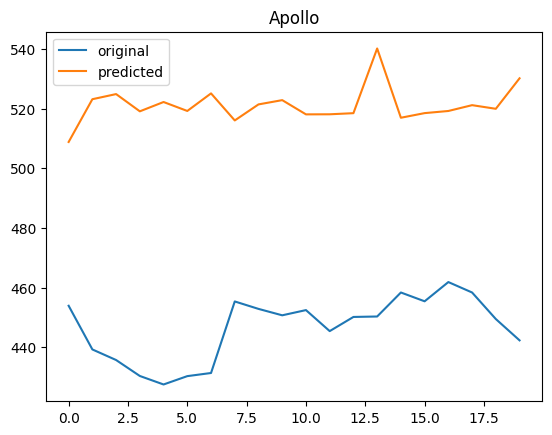

In [161]:

plt.title('Apollo')
plt.plot(apollo_original)
plt.plot(pred)
plt.legend(['original','predicted'])

In [164]:
## bajaj



ct=0
min_error=1.7976931348623157e+308
best_weights=[]

while ct<100:
  m1=np.random.rand()*0.06
  m2=np.random.rand()*0.06
  m3=np.random.rand()*0.06
  m4=np.random.rand()
  m5=np.random.rand()*0.06
  m6=np.random.rand()*0.06
  m7=np.random.rand()*0.06
  m8=np.random.rand()*0.06
  m9=np.random.rand()*0.06
  m10=np.random.rand()*0.06
  m11=np.random.rand()*0.06
  sum=np.sum([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11])
  m1=m1/sum
  m2=m2/sum
  m3=m3/sum
  m4=m4/sum
  m5=m5/sum
  m6=m6/sum
  m7=m7/sum
  m8=m8/sum
  m9=m9/sum
  m10=m10/sum
  m11=m11/sum
  mse=0
  temp=[]
  if max(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11)==m4 and m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11<=1:

    for i in range(len(bajaj_actual_pred)):
      v=m1*tvs_actual_pred[i]+m2*ashok_actual_pred[i]+m3*apollo_actual_pred[i]+m4*bajaj_actual_pred[i]+m5*balkrishna_actual_pred[i]+m6*bosch_actual_pred[i]+m7*eicher_actual_pred[i]+m8*hero_actual_pred[i]+m9*mahindra_actual_pred[i]+m10*motherson_actual_pred[i]+m11*tube_actual_pred[i]
      temp.append(v)
    temp=np.array(temp)
    # print(temp)
    mse=np.mean((bajaj_actual_pred-temp)**2)
    if mse<min_error:
      best_weights=[]
      min_error=mse
      best_weights.append(m1)
      best_weights.append(m2)
      best_weights.append(m3)
      best_weights.append(m4)
      best_weights.append(m5)
      best_weights.append(m6)
      best_weights.append(m7)
      best_weights.append(m8)
      best_weights.append(m9)
      best_weights.append(m10)
      best_weights.append(m11)
    ct=ct+1
  else:
    ct=ct+1
print(best_weights)

pred=[]
for i in range(len(bajaj_actual_pred)):
  v=best_weights[0]*tvs_actual_pred[i]+best_weights[1]*ashok_actual_pred[i]+best_weights[2]*apollo_actual_pred[i]+best_weights[3]*bajaj_actual_pred[i]+best_weights[4]*balkrishna_actual_pred[i]+best_weights[5]*bosch_actual_pred[i]+best_weights[6]*eicher_actual_pred[i]+best_weights[7]*hero_actual_pred[i]+best_weights[8]*mahindra_actual_pred[i]+best_weights[9]*motherson_actual_pred[i]+best_weights[10]*tube_actual_pred[i]
  pred.append(v)

[0.015796095474175053, 0.006142189162550027, 0.004511965541722955, 0.7774972451267883, 0.023826714562142706, 0.04379958664819511, 0.026389149812022863, 0.04411258617386931, 0.015390404640585127, 0.03877824971843759, 0.0037558131395110227]


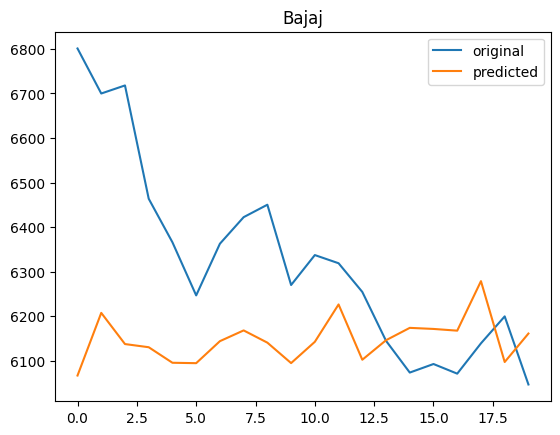

In [165]:

plt.title('Bajaj')
plt.plot(bajaj_original)
plt.plot(pred)
plt.legend(['original','predicted'])

In [171]:
# balkrishna motors



ct=0
min_error=1.7976931348623157e+308
best_weights=[]

while ct<100:
  m1=np.random.rand()*0.06
  m2=np.random.rand()*0.06
  m3=np.random.rand()*0.06
  m4=np.random.rand()*0.06
  m5=np.random.rand()
  m6=np.random.rand()*0.06
  m7=np.random.rand()*0.06
  m8=np.random.rand()*0.06
  m9=np.random.rand()*0.06
  m10=np.random.rand()*0.06
  m11=np.random.rand()*0.06
  sum=np.sum([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11])
  m1=m1/sum
  m2=m2/sum
  m3=m3/sum
  m4=m4/sum
  m5=m5/sum
  m6=m6/sum
  m7=m7/sum
  m8=m8/sum
  m9=m9/sum
  m10=m10/sum
  m11=m11/sum
  mse=0
  temp=[]
  if max(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11)==m5 and m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11<=1:

    for i in range(len(balkrishna_actual_pred)):
      v=m1*tvs_actual_pred[i]+m2*ashok_actual_pred[i]+m3*apollo_actual_pred[i]+m4*bajaj_actual_pred[i]+m5*balkrishna_actual_pred[i]+m6*bosch_actual_pred[i]+m7*eicher_actual_pred[i]+m8*hero_actual_pred[i]+m9*mahindra_actual_pred[i]+m10*motherson_actual_pred[i]+m11*tube_actual_pred[i]
      temp.append(v)
    temp=np.array(temp)
    # print(temp)
    mse=np.mean((balkrishna_actual_pred-temp)**2)
    if mse<min_error:
      best_weights=[]
      min_error=mse
      best_weights.append(m1)
      best_weights.append(m2)
      best_weights.append(m3)
      best_weights.append(m4)
      best_weights.append(m5)
      best_weights.append(m6)
      best_weights.append(m7)
      best_weights.append(m8)
      best_weights.append(m9)
      best_weights.append(m10)
      best_weights.append(m11)
    ct=ct+1
  else:
    ct=ct+1
print(best_weights)

pred=[]
for i in range(len(balkrishna_actual_pred)):
  v=best_weights[0]*tvs_actual_pred[i]+best_weights[1]*ashok_actual_pred[i]+best_weights[2]*apollo_actual_pred[i]+best_weights[3]*bajaj_actual_pred[i]+best_weights[4]*balkrishna_actual_pred[i]+best_weights[5]*bosch_actual_pred[i]+best_weights[6]*eicher_actual_pred[i]+best_weights[7]*hero_actual_pred[i]+best_weights[8]*mahindra_actual_pred[i]+best_weights[9]*motherson_actual_pred[i]+best_weights[10]*tube_actual_pred[i]
  pred.append(v)

[0.009958228750747483, 0.041439083937512305, 0.028643090569681843, 0.02867301694778767, 0.7432134707519004, 0.0024420686241396583, 0.036335781087989745, 0.00044537675675865844, 0.030787860980253084, 0.020103760193174888, 0.05795826140005418]


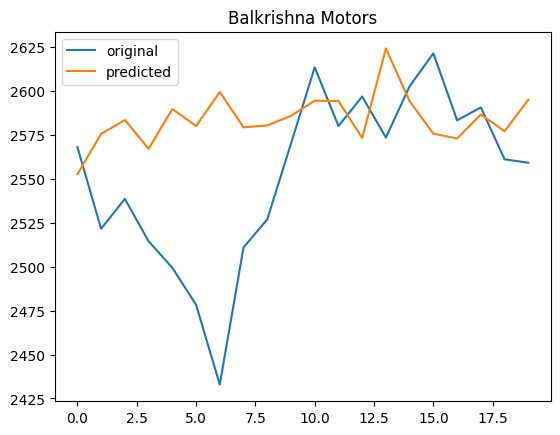

In [172]:

plt.title('Balkrishna Motors')
plt.plot(balkrishna_original)
plt.plot(pred)
plt.legend(['original','predicted'])

In [181]:
# bosch



ct=0
min_error=1.7976931348623157e+308
best_weights=[]

while ct<100:
  m1=np.random.rand()*0.006
  m2=np.random.rand()*0.006
  m3=np.random.rand()*0.006
  m4=np.random.rand()*0.006
  m5=np.random.rand()*0.006
  m6=np.random.rand()
  m7=np.random.rand()*0.006
  m8=np.random.rand()*0.006
  m9=np.random.rand()*0.006
  m10=np.random.rand()*0.006
  m11=np.random.rand()*0.006
  sum=np.sum([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11])
  m1=m1/sum
  m2=m2/sum
  m3=m3/sum
  m4=m4/sum
  m5=m5/sum
  m6=m6/sum
  m7=m7/sum
  m8=m8/sum
  m9=m9/sum
  m10=m10/sum
  m11=m11/sum
  mse=0
  temp=[]
  if max(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11)==m6 and m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11<=1:

    for i in range(len(bosch_actual_pred)):
      v=m1*tvs_actual_pred[i]+m2*ashok_actual_pred[i]+m3*apollo_actual_pred[i]+m4*bajaj_actual_pred[i]+m5*balkrishna_actual_pred[i]+m6*bosch_actual_pred[i]+m7*eicher_actual_pred[i]+m8*hero_actual_pred[i]+m9*mahindra_actual_pred[i]+m10*motherson_actual_pred[i]+m11*tube_actual_pred[i]
      temp.append(v)
    temp=np.array(temp)
    # print(temp)
    mse=np.mean((bosch_actual_pred-temp)**2)
    if mse<min_error:
      best_weights=[]
      min_error=mse
      best_weights.append(m1)
      best_weights.append(m2)
      best_weights.append(m3)
      best_weights.append(m4)
      best_weights.append(m5)
      best_weights.append(m6)
      best_weights.append(m7)
      best_weights.append(m8)
      best_weights.append(m9)
      best_weights.append(m10)
      best_weights.append(m11)
    ct=ct+1
  else:
    ct=ct+1
print(best_weights)

pred=[]
for i in range(len(bosch_actual_pred)):
  v=best_weights[0]*tvs_actual_pred[i]+best_weights[1]*ashok_actual_pred[i]+best_weights[2]*apollo_actual_pred[i]+best_weights[3]*bajaj_actual_pred[i]+best_weights[4]*balkrishna_actual_pred[i]+best_weights[5]*bosch_actual_pred[i]+best_weights[6]*eicher_actual_pred[i]+best_weights[7]*hero_actual_pred[i]+best_weights[8]*mahindra_actual_pred[i]+best_weights[9]*motherson_actual_pred[i]+best_weights[10]*tube_actual_pred[i]
  pred.append(v)

[0.006344480246616851, 0.0006940586536170742, 0.004641655231982205, 0.0022321869508436514, 0.0030815665292795143, 0.975605280657629, 0.002861426515508218, 0.002032175236851427, 0.0009247694428035201, 0.0011813157892732358, 0.00040108474559530176]


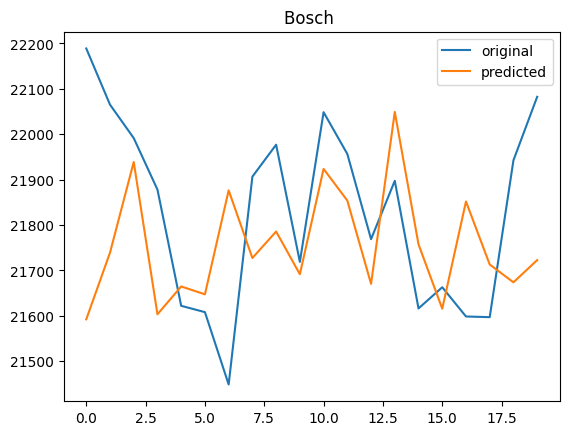

In [182]:

plt.title('Bosch ')
plt.plot(bosch_original)
plt.plot(pred)
plt.legend(['original','predicted'])

In [197]:
# eicher


ct=0
min_error=1.7976931348623157e+308
best_weights=[]

while ct<100:
  m1=np.random.rand()*0.06
  m2=np.random.rand()*0.06
  m3=np.random.rand()*0.06
  m4=np.random.rand()*0.06
  m5=np.random.rand()*0.06
  m6=np.random.rand()*0.06
  m7=np.random.rand()
  m8=np.random.rand()*0.06
  m9=np.random.rand()*0.06
  m10=np.random.rand()*0.06
  m11=np.random.rand()*0.06
  sum=np.sum([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11])
  m1=m1/sum
  m2=m2/sum
  m3=m3/sum
  m4=m4/sum
  m5=m5/sum
  m6=m6/sum
  m7=m7/sum
  m8=m8/sum
  m9=m9/sum
  m10=m10/sum
  m11=m11/sum
  mse=0
  temp=[]
  if max(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11)==m7 and m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11<=1:

    for i in range(len(eicher_actual_pred)):
      v=m1*tvs_actual_pred[i]+m2*ashok_actual_pred[i]+m3*apollo_actual_pred[i]+m4*bajaj_actual_pred[i]+m5*balkrishna_actual_pred[i]+m6*bosch_actual_pred[i]+m7*eicher_actual_pred[i]+m8*hero_actual_pred[i]+m9*mahindra_actual_pred[i]+m10*motherson_actual_pred[i]+m11*tube_actual_pred[i]
      temp.append(v)
    temp=np.array(temp)
    # print(temp)
    mse=np.mean((eicher_actual_pred-temp)**2)
    if mse<min_error:
      best_weights=[]
      min_error=mse
      best_weights.append(m1)
      best_weights.append(m2)
      best_weights.append(m3)
      best_weights.append(m4)
      best_weights.append(m5)
      best_weights.append(m6)
      best_weights.append(m7)
      best_weights.append(m8)
      best_weights.append(m9)
      best_weights.append(m10)
      best_weights.append(m11)
    ct=ct+1
  else:
    ct=ct+1
print(best_weights)

pred=[]
for i in range(len(eicher_actual_pred)):
  v=best_weights[0]*tvs_actual_pred[i]+best_weights[1]*ashok_actual_pred[i]+best_weights[2]*apollo_actual_pred[i]+best_weights[3]*bajaj_actual_pred[i]+best_weights[4]*balkrishna_actual_pred[i]+best_weights[5]*bosch_actual_pred[i]+best_weights[6]*eicher_actual_pred[i]+best_weights[7]*hero_actual_pred[i]+best_weights[8]*mahindra_actual_pred[i]+best_weights[9]*motherson_actual_pred[i]+best_weights[10]*tube_actual_pred[i]
  pred.append(v)

[0.03185588425659057, 0.0026940486476589383, 0.04466431538322062, 0.03507043495559993, 0.030710999302673302, 0.014655994433327463, 0.8087227263219208, 0.0011972152192940182, 0.022662781981189865, 0.004239194482475409, 0.00352640501604908]


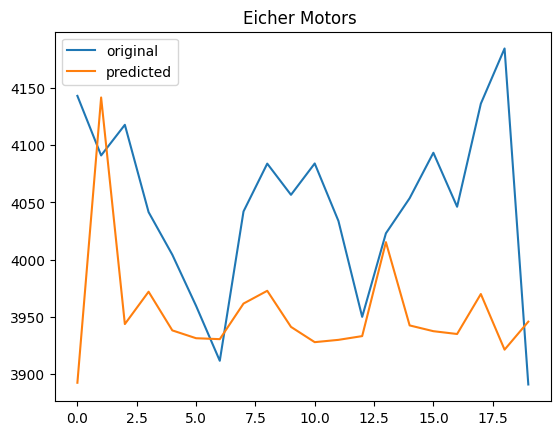

In [198]:

plt.title('Eicher Motors ')
plt.plot(eicher_original)
plt.plot(pred)
plt.legend(['original','predicted'])

In [241]:
# hero


ct=0
min_error=1.7976931348623157e+308
best_weights=[]

while ct<100:
  m1=np.random.rand()*0.06
  m2=np.random.rand()*0.06
  m3=np.random.rand()*0.06
  m4=np.random.rand()*0.06
  m5=np.random.rand()*0.06
  m6=np.random.rand()*0.06
  m7=np.random.rand()*0.06
  m8=np.random.rand()
  m9=np.random.rand()*0.06
  m10=np.random.rand()*0.06
  m11=np.random.rand()*0.06
  sum=np.sum([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11])
  m1=m1/sum
  m2=m2/sum
  m3=m3/sum
  m4=m4/sum
  m5=m5/sum
  m6=m6/sum
  m7=m7/sum
  m8=m8/sum
  m9=m9/sum
  m10=m10/sum
  m11=m11/sum
  mse=0
  temp=[]
  if max(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11)==m8 and m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11<=1:

    for i in range(len(hero_actual_pred)):
      v=m1*tvs_actual_pred[i]+m2*ashok_actual_pred[i]+m3*apollo_actual_pred[i]+m4*bajaj_actual_pred[i]+m5*balkrishna_actual_pred[i]+m6*bosch_actual_pred[i]+m7*eicher_actual_pred[i]+m8*hero_actual_pred[i]+m9*mahindra_actual_pred[i]+m10*motherson_actual_pred[i]+m11*tube_actual_pred[i]
      temp.append(v)
    temp=np.array(temp)
    # print(temp)
    mse=np.mean((hero_actual_pred-temp)**2)
    if mse<min_error:
      best_weights=[]
      min_error=mse
      best_weights.append(m1)
      best_weights.append(m2)
      best_weights.append(m3)
      best_weights.append(m4)
      best_weights.append(m5)
      best_weights.append(m6)
      best_weights.append(m7)
      best_weights.append(m8)
      best_weights.append(m9)
      best_weights.append(m10)
      best_weights.append(m11)
    ct=ct+1
  else:
    ct=ct+1
print(best_weights)

pred=[]
for i in range(len(hero_actual_pred)):
  v=best_weights[0]*tvs_actual_pred[i]+best_weights[1]*ashok_actual_pred[i]+best_weights[2]*apollo_actual_pred[i]+best_weights[3]*bajaj_actual_pred[i]+best_weights[4]*balkrishna_actual_pred[i]+best_weights[5]*bosch_actual_pred[i]+best_weights[6]*eicher_actual_pred[i]+best_weights[7]*hero_actual_pred[i]+best_weights[8]*mahindra_actual_pred[i]+best_weights[9]*motherson_actual_pred[i]+best_weights[10]*tube_actual_pred[i]
  pred.append(v)

[0.017255178454562228, 0.030411241098109044, 0.00769201407280477, 0.04894787561600281, 0.05295514079611845, 0.009752374474660715, 0.05676521352301903, 0.7424733637392292, 0.005018535794838945, 0.015094013913522015, 0.013635048517132846]


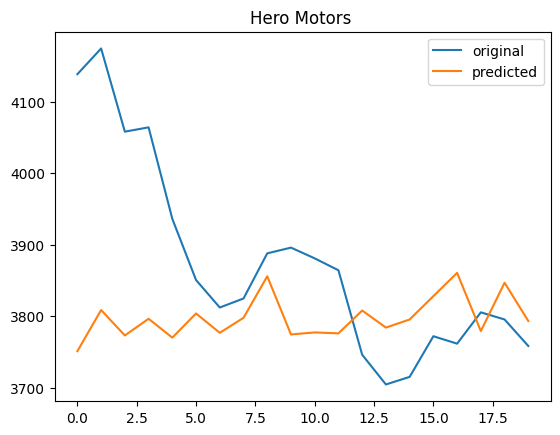

In [243]:

plt.title('Hero Motors ')
plt.plot(heromotors_original)
plt.plot(pred)
plt.legend(['original','predicted'])

In [215]:
## mahindra



ct=0
min_error=1.7976931348623157e+308
best_weights=[]

while ct<100:
  m1=np.random.rand()*0.006
  m2=np.random.rand()*0.006
  m3=np.random.rand()*0.006
  m4=np.random.rand()*0.006
  m5=np.random.rand()*0.006
  m6=np.random.rand()*0.006
  m7=np.random.rand()*0.006
  m8=np.random.rand()*0.006
  m9=np.random.rand()
  m10=np.random.rand()*0.006
  m11=np.random.rand()*0.006
  sum=np.sum([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11])
  m1=m1/sum
  m2=m2/sum
  m3=m3/sum
  m4=m4/sum
  m5=m5/sum
  m6=m6/sum
  m7=m7/sum
  m8=m8/sum
  m9=m9/sum
  m10=m10/sum
  m11=m11/sum
  mse=0
  temp=[]
  if max(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11)==m9 and m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11<=1:

    for i in range(len(mahindra_actual_pred)):
      v=m1*tvs_actual_pred[i]+m2*ashok_actual_pred[i]+m3*apollo_actual_pred[i]+m4*bajaj_actual_pred[i]+m5*balkrishna_actual_pred[i]+m6*bosch_actual_pred[i]+m7*eicher_actual_pred[i]+m8*hero_actual_pred[i]+m9*mahindra_actual_pred[i]+m10*motherson_actual_pred[i]+m11*tube_actual_pred[i]
      temp.append(v)
    temp=np.array(temp)
    # print(temp)
    mse=np.mean((mahindra_actual_pred-temp)**2)
    if mse<min_error:
      best_weights=[]
      min_error=mse
      best_weights.append(m1)
      best_weights.append(m2)
      best_weights.append(m3)
      best_weights.append(m4)
      best_weights.append(m5)
      best_weights.append(m6)
      best_weights.append(m7)
      best_weights.append(m8)
      best_weights.append(m9)
      best_weights.append(m10)
      best_weights.append(m11)
    ct=ct+1
  else:
    ct=ct+1
print(best_weights)

pred=[]
for i in range(len(mahindra_actual_pred)):
  v=best_weights[0]*tvs_actual_pred[i]+best_weights[1]*ashok_actual_pred[i]+best_weights[2]*apollo_actual_pred[i]+best_weights[3]*bajaj_actual_pred[i]+best_weights[4]*balkrishna_actual_pred[i]+best_weights[5]*bosch_actual_pred[i]+best_weights[6]*eicher_actual_pred[i]+best_weights[7]*hero_actual_pred[i]+best_weights[8]*mahindra_actual_pred[i]+best_weights[9]*motherson_actual_pred[i]+best_weights[10]*tube_actual_pred[i]
  pred.append(v)

[0.0033660453014245305, 0.0008915124817573053, 0.0012961618307881, 0.0034748410701140268, 0.0005092303223672294, 0.00030489438232023797, 0.004703381514704245, 0.0024453745413642617, 0.9778019406856379, 0.005114872237459966, 9.174563206220232e-05]


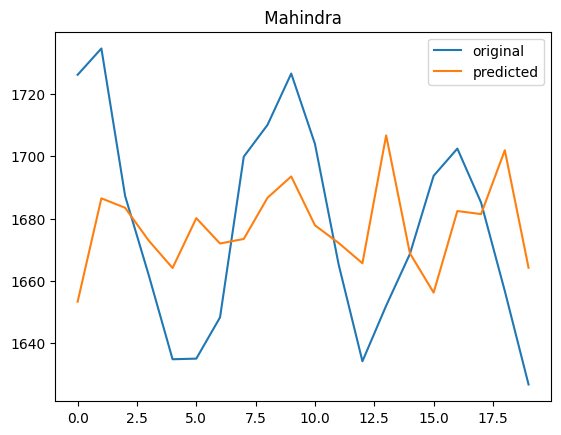

In [216]:

plt.title(' Mahindra ')
plt.plot(mahindra_original)
plt.plot(pred)
plt.legend(['original','predicted'])

In [223]:
## motherson



ct=0
min_error=1.7976931348623157e+308
best_weights=[]

while ct<100:
  m1=np.random.rand()*0.005
  m2=np.random.rand()*0.005
  m3=np.random.rand()*0.005
  m4=np.random.rand()*0.005
  m5=np.random.rand()*0.005
  m6=np.random.rand()*0.005
  m7=np.random.rand()*0.005
  m8=np.random.rand()*0.005
  m9=np.random.rand()*0.005
  m10=np.random.rand()
  m11=np.random.rand()*0.005
  sum=np.sum([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11])
  m1=m1/sum
  m2=m2/sum
  m3=m3/sum
  m4=m4/sum
  m5=m5/sum
  m6=m6/sum
  m7=m7/sum
  m8=m8/sum
  m9=m9/sum
  m10=m10/sum
  m11=m11/sum
  mse=0
  temp=[]
  if max(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11)==m10 and m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11<=1:

    for i in range(len(motherson_actual_pred)):
      v=m1*tvs_actual_pred[i]+m2*ashok_actual_pred[i]+m3*apollo_actual_pred[i]+m4*bajaj_actual_pred[i]+m5*balkrishna_actual_pred[i]+m6*bosch_actual_pred[i]+m7*eicher_actual_pred[i]+m8*hero_actual_pred[i]+m9*mahindra_actual_pred[i]+m10*motherson_actual_pred[i]+m11*tube_actual_pred[i]
      temp.append(v)
    temp=np.array(temp)
    # print(temp)
    mse=np.mean((motherson_actual_pred-temp)**2)
    if mse<min_error:
      best_weights=[]
      min_error=mse
      best_weights.append(m1)
      best_weights.append(m2)
      best_weights.append(m3)
      best_weights.append(m4)
      best_weights.append(m5)
      best_weights.append(m6)
      best_weights.append(m7)
      best_weights.append(m8)
      best_weights.append(m9)
      best_weights.append(m10)
      best_weights.append(m11)
    ct=ct+1
  else:
    ct=ct+1
print(best_weights)

pred=[]
for i in range(len(motherson_actual_pred)):
  v=best_weights[0]*tvs_actual_pred[i]+best_weights[1]*ashok_actual_pred[i]+best_weights[2]*apollo_actual_pred[i]+best_weights[3]*bajaj_actual_pred[i]+best_weights[4]*balkrishna_actual_pred[i]+best_weights[5]*bosch_actual_pred[i]+best_weights[6]*eicher_actual_pred[i]+best_weights[7]*hero_actual_pred[i]+best_weights[8]*mahindra_actual_pred[i]+best_weights[9]*motherson_actual_pred[i]+best_weights[10]*tube_actual_pred[i]
  pred.append(v)

[4.1533549359068385e-05, 0.0016805145687959736, 0.0011910357543782675, 0.0006938673021915845, 0.0004551690651349763, 6.11853293799498e-05, 0.0027393378474235173, 0.001107033218827176, 0.003960407007575141, 0.9868238893498396, 0.0012460270070946853]


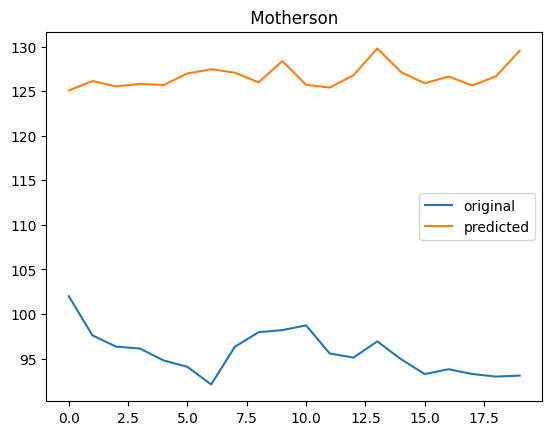

In [224]:
## Motherson
plt.title(' Motherson ')
plt.plot(motherson_original)
plt.plot(pred)
plt.legend(['original','predicted'])

In [239]:
## tube


ct=0
min_error=1.7976931348623157e+308
best_weights=[]

while ct<100:
  m1=np.random.rand()*0.008
  m3=np.random.rand()*0.008
  m4=np.random.rand()*0.008
  m5=np.random.rand()*0.008
  m6=np.random.rand()*0.008
  m7=np.random.rand()*0.008
  m8=np.random.rand()*0.008
  m9=np.random.rand()*0.008
  m10=np.random.rand()*0.008
  m11=np.random.rand()
  sum=np.sum([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11])
  m1=m1/sum
  m2=m2/sum
  m3=m3/sum
  m4=m4/sum
  m5=m5/sum
  m6=m6/sum
  m7=m7/sum
  m8=m8/sum
  m9=m9/sum
  m10=m10/sum
  m11=m11/sum
  mse=0
  temp=[]
  if max(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11)==m11 and m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11<=1:

    for i in range(len(tube_actual_pred)):
      v=m1*tvs_actual_pred[i]+m2*ashok_actual_pred[i]+m3*apollo_actual_pred[i]+m4*bajaj_actual_pred[i]+m5*balkrishna_actual_pred[i]+m6*bosch_actual_pred[i]+m7*eicher_actual_pred[i]+m8*hero_actual_pred[i]+m9*mahindra_actual_pred[i]+m10*motherson_actual_pred[i]+m11*tube_actual_pred[i]
      temp.append(v)
    temp=np.array(temp)
    # print(temp)
    mse=np.mean((tube_actual_pred-temp)**2)
    if mse<min_error:
      best_weights=[]
      min_error=mse
      best_weights.append(m1)
      best_weights.append(m2)
      best_weights.append(m3)
      best_weights.append(m4)
      best_weights.append(m5)
      best_weights.append(m6)
      best_weights.append(m7)
      best_weights.append(m8)
      best_weights.append(m9)
      best_weights.append(m10)
      best_weights.append(m11)
    ct=ct+1
  else:
    ct=ct+1
print(best_weights)

pred=[]
for i in range(len(tube_actual_pred)):
  v=best_weights[0]*tvs_actual_pred[i]+best_weights[1]*ashok_actual_pred[i]+best_weights[2]*apollo_actual_pred[i]+best_weights[3]*bajaj_actual_pred[i]+best_weights[4]*balkrishna_actual_pred[i]+best_weights[5]*bosch_actual_pred[i]+best_weights[6]*eicher_actual_pred[i]+best_weights[7]*hero_actual_pred[i]+best_weights[8]*mahindra_actual_pred[i]+best_weights[9]*motherson_actual_pred[i]+best_weights[10]*tube_actual_pred[i]
  pred.append(v)

[0.00296454579869432, 0.010013966592252982, 0.006922958175361282, 0.006172189867765016, 0.00708113812902151, 0.0038534575011619186, 4.663617559096405e-06, 0.004062130949084663, 0.005991283121258516, 0.002939297854207022, 0.9499943683936336]


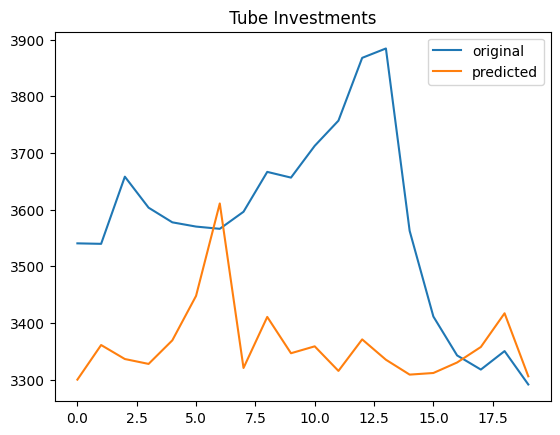

In [240]:

plt.title(' Tube Investments ')
plt.plot(tube_original)
plt.plot(pred)
plt.legend(['original','predicted'])